#### 1.Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [51]:
glass = pd.read_csv('D:/DATA-DS/assingment/Shan Malhotra DS assingment/KNN/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [52]:
scaler = StandardScaler()

In [53]:
scaler.fit(glass.drop('Type',axis=1))

StandardScaler()

In [54]:
scaled_feature = scaler.transform(glass.drop('Type',axis=1))

In [55]:
glass2 =pd.DataFrame(scaled_feature, columns=glass.columns[:-1])
glass2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


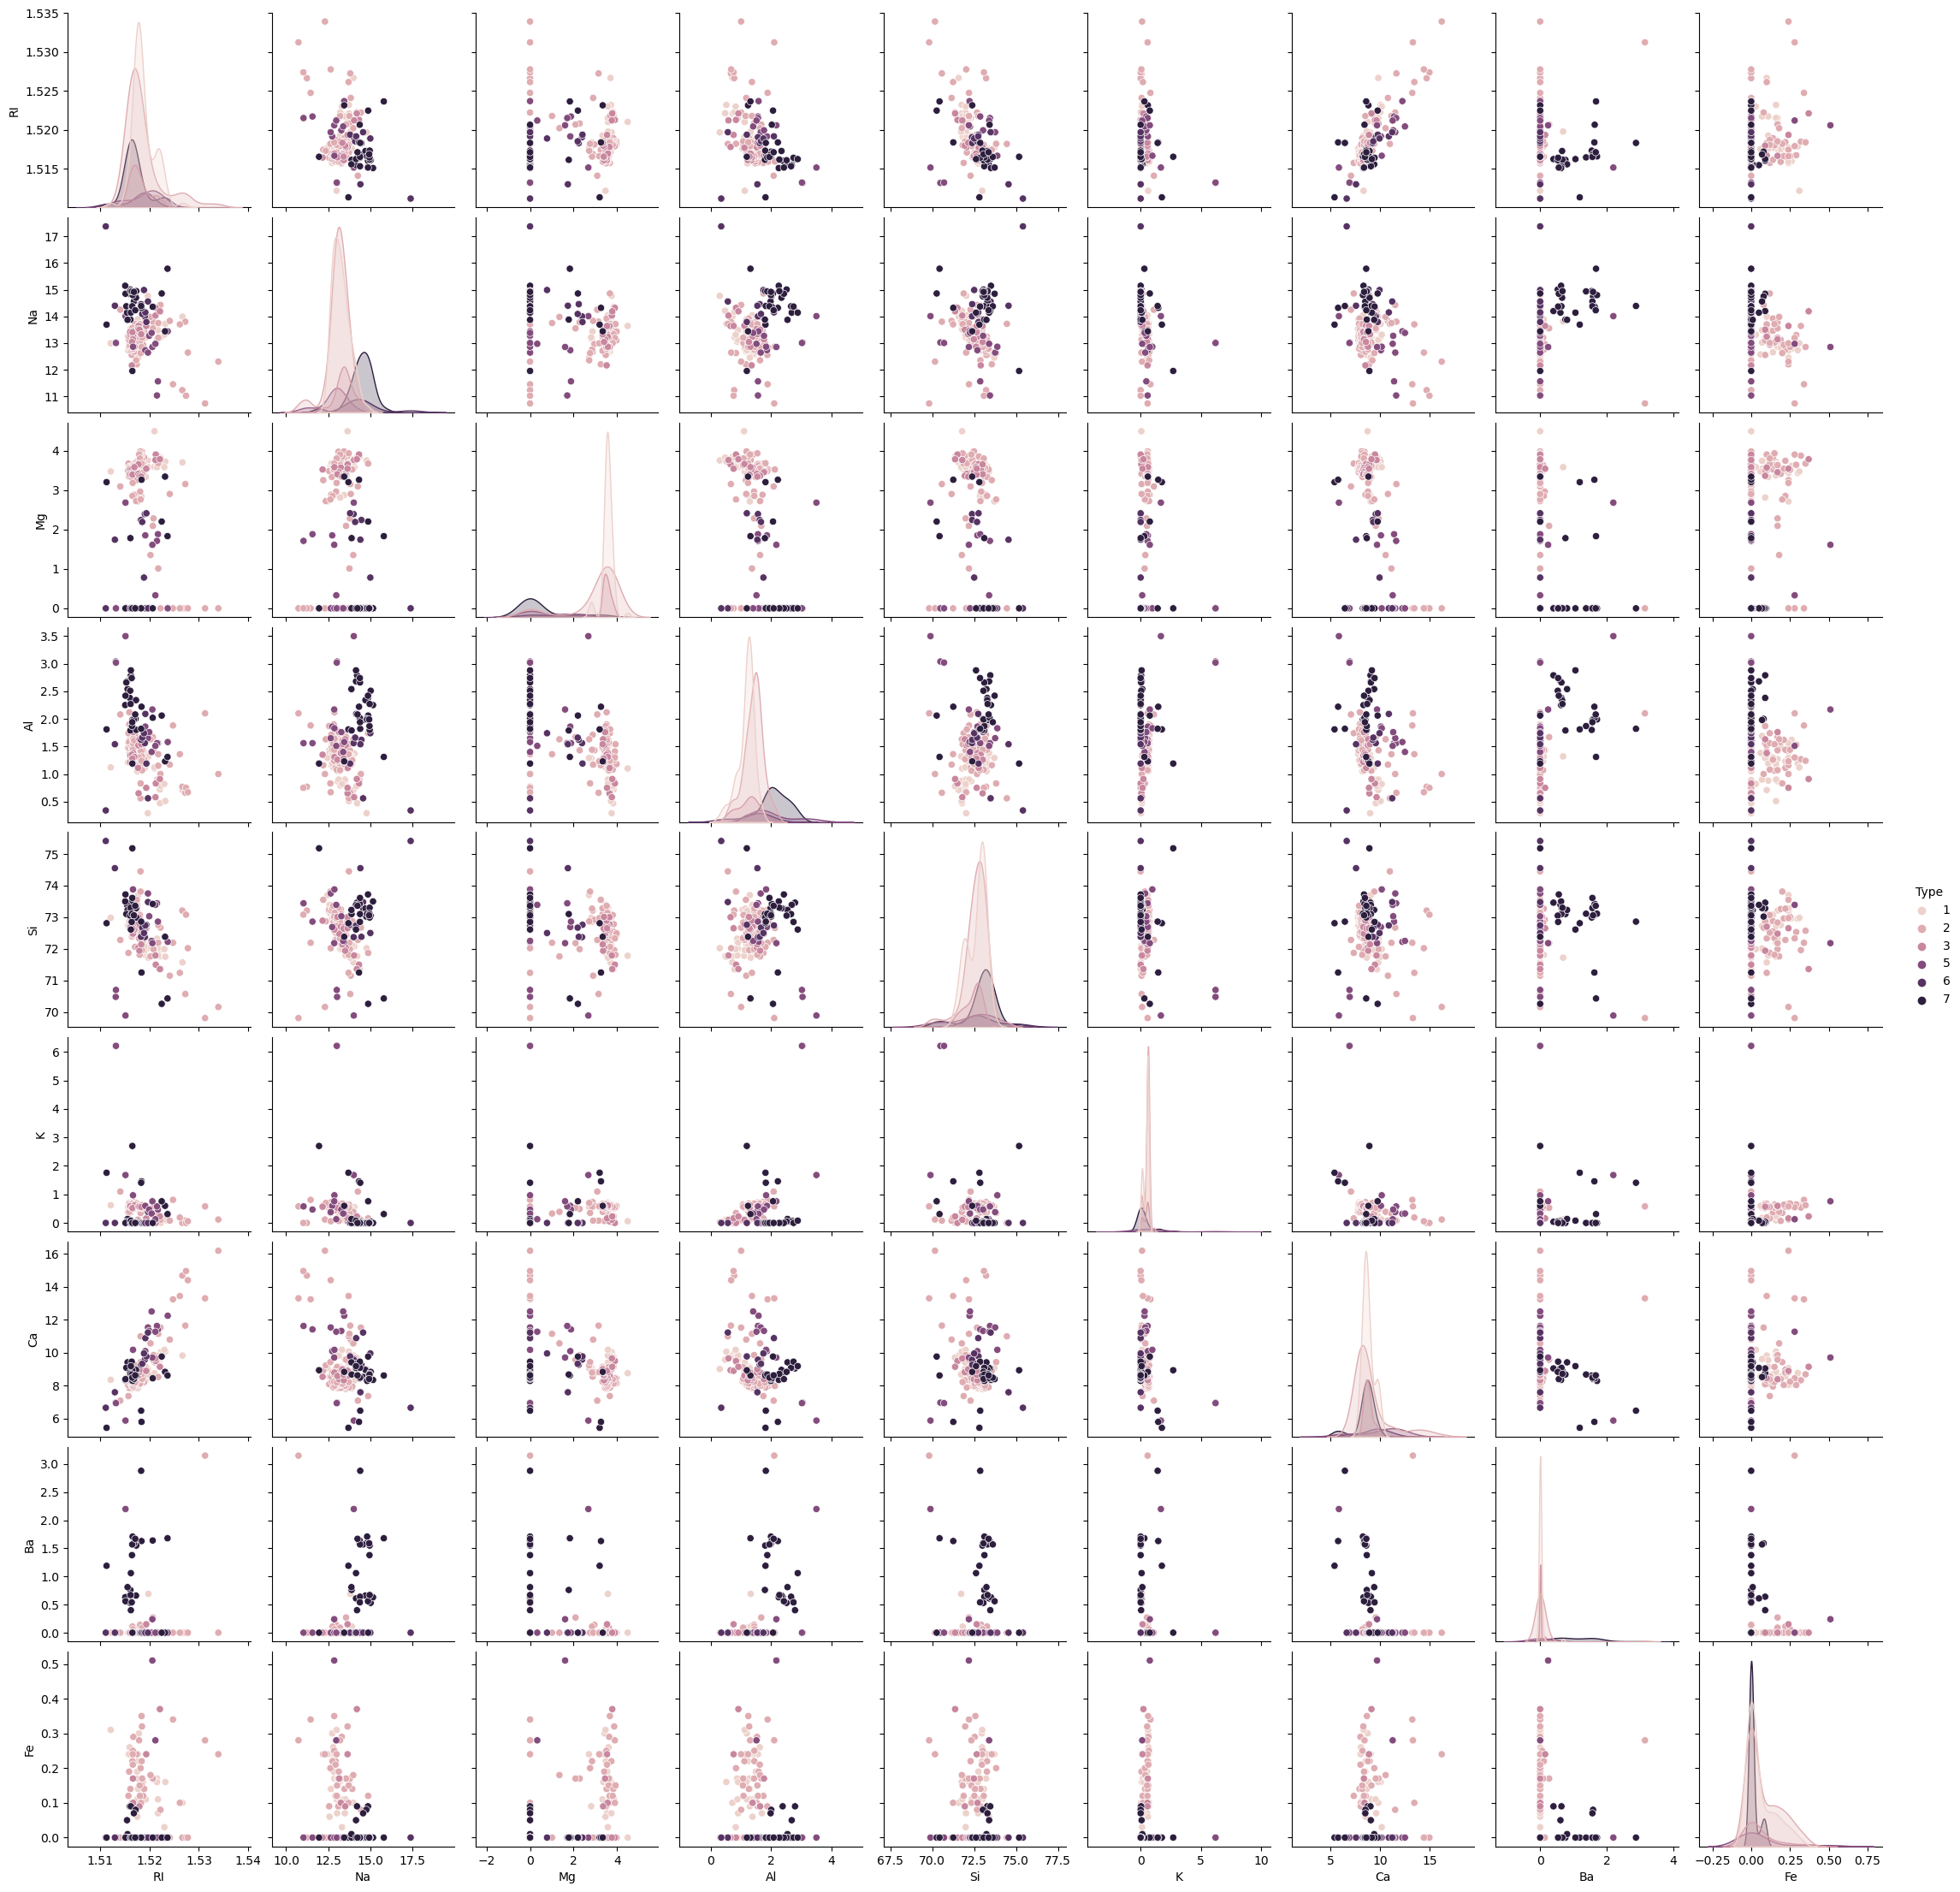

In [56]:
sns.pairplot(glass, hue='Type')

In [57]:
X_train, X_test ,y_train, y_test = train_test_split(scaled_feature, glass['Type'],test_size=0.30)

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
pred = knn.predict(X_test)

In [35]:
print(confusion_matrix(y_test,pred))

[[14  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  1  0  0  3  2]]


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.54      0.82      0.65        17
           2       0.75      0.52      0.62        23
           3       0.14      0.17      0.15         6
           5       0.60      0.50      0.55         6
           6       1.00      1.00      1.00         4
           7       0.86      0.67      0.75         9

    accuracy                           0.62        65
   macro avg       0.65      0.61      0.62        65
weighted avg       0.66      0.62      0.62        65



In [61]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,glass2,glass['Type'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy_rate')

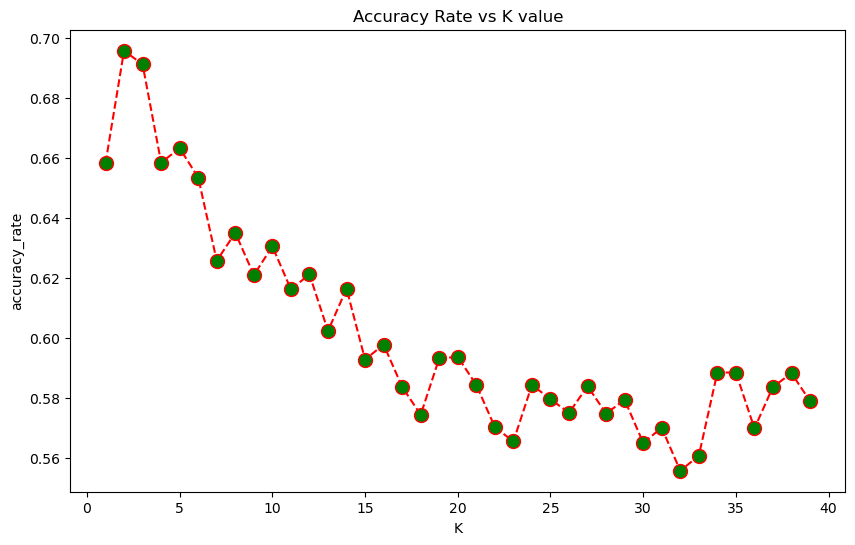

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate, color='Red', linestyle='dashed', marker='o',
        markerfacecolor='green',markersize=10)
plt.title('Accuracy Rate vs K value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

In [63]:
# when k =1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.54      0.82      0.65        17
           2       0.75      0.52      0.62        23
           3       0.14      0.17      0.15         6
           5       0.60      0.50      0.55         6
           6       1.00      1.00      1.00         4
           7       0.86      0.67      0.75         9

    accuracy                           0.62        65
   macro avg       0.65      0.61      0.62        65
weighted avg       0.66      0.62      0.62        65



In [40]:
# when k =5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.40      1.00      0.57         2
           7       1.00      0.33      0.50         6

    accuracy                           0.87        31
   macro avg       0.77      0.76      0.72        31
weighted avg       0.96      0.87      0.88        31



##### 2. Implement a KNN model to classify the animals in to categorie

In [64]:
zoo = pd.read_csv('D:/DATA-DS/assingment/Shan Malhotra DS assingment/KNN/Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [42]:
zoo1 = zoo.drop(['animal name'], axis=1)

In [66]:
scaler = StandardScaler()
scaler.fit(zoo1.drop('type',axis=1))

StandardScaler()

In [67]:
scaled_feature = scaler.transform(zoo1.drop('type',axis=1))

In [68]:
zoo2 =pd.DataFrame(scaled_feature, columns=zoo1.columns[:-1])
zoo2

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


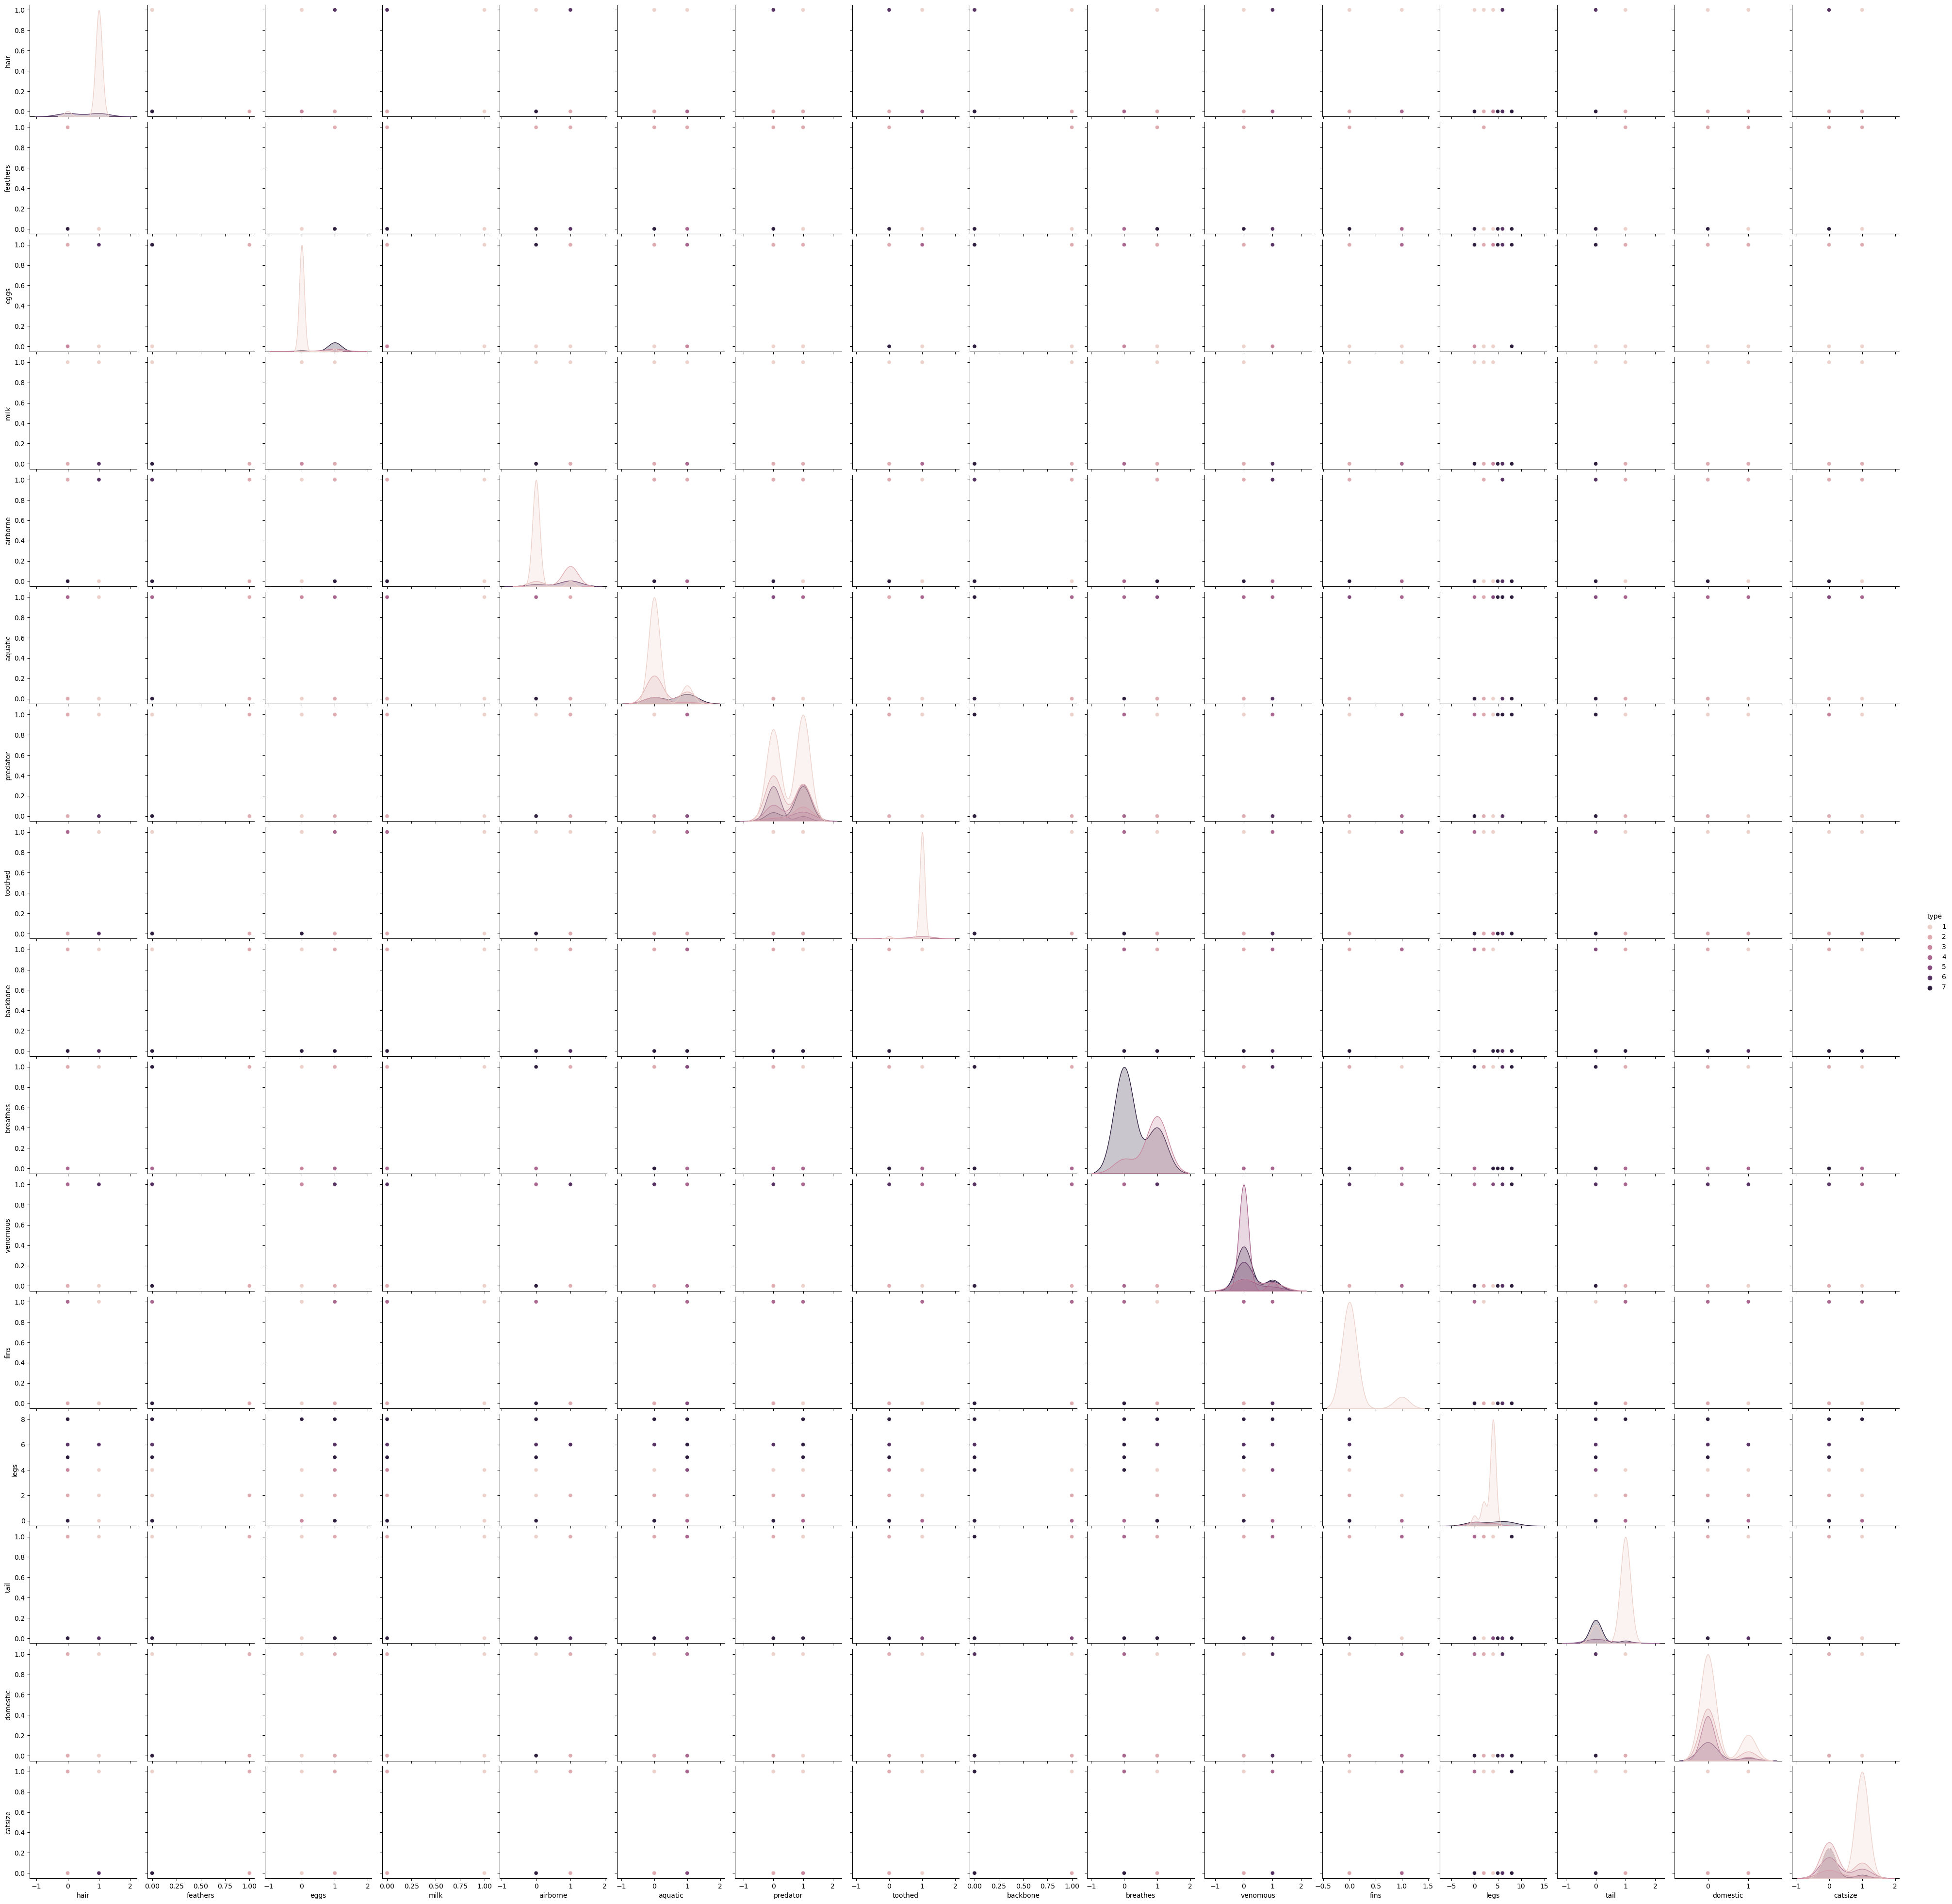

In [69]:
sns.pairplot(zoo1, hue='type')

In [70]:
X_train, X_test ,y_train, y_test = train_test_split(scaled_feature, zoo['type'],test_size=0.30)

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
pred = knn.predict(X_test)

In [74]:
print(confusion_matrix(y_test,pred))

[[9 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 1 0 2 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 1 2]]


In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         4
           5       1.00      0.67      0.80         3
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.90      0.90      0.88        31
weighted avg       0.96      0.94      0.94        31



In [76]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,zoo2,zoo1['type'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy_rate')

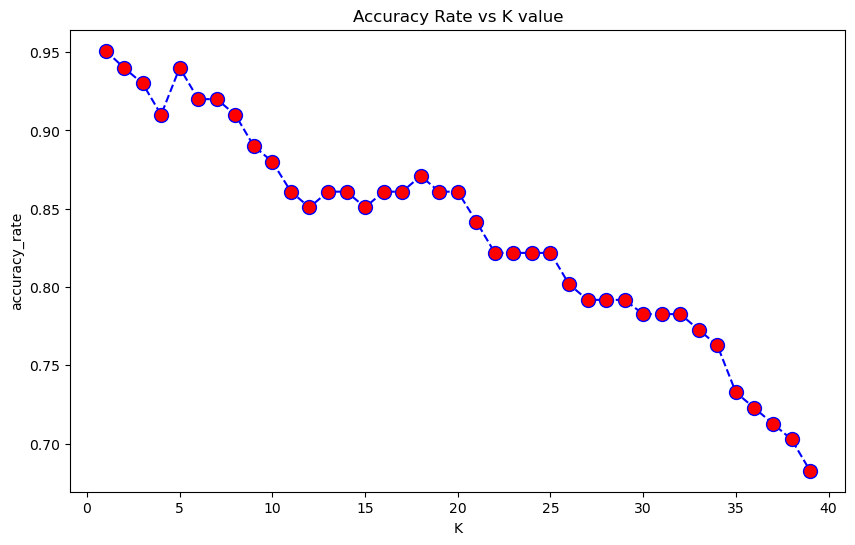

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate, color='Blue', linestyle='dashed', marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs K value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

In [78]:
# when k =5

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         4
           5       1.00      0.67      0.80         3
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.90      0.90      0.88        31
weighted avg       0.96      0.94      0.94        31



In [79]:
# when k =5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.88      1.00      0.93         7
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         3
           6       0.80      1.00      0.89         4
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.72      0.81      0.73        31
weighted avg       0.83      0.87      0.84        31

